**İlk Önce RBF'den bahsedelim**
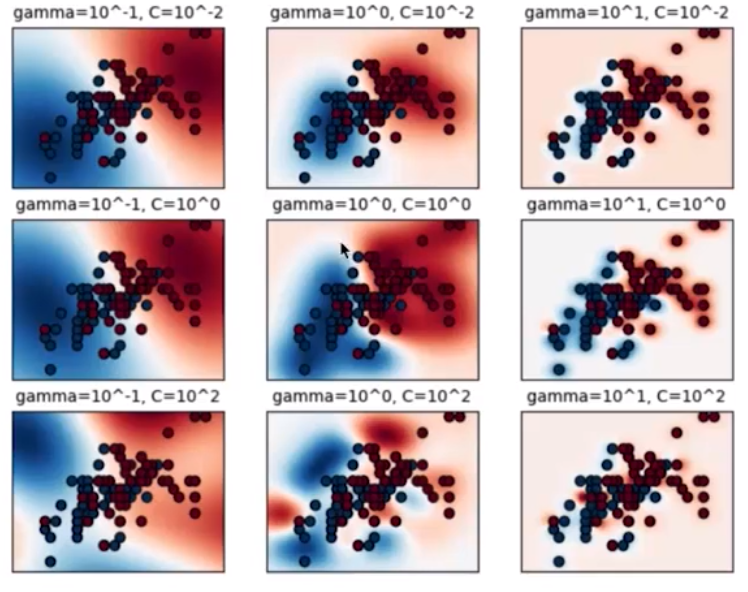

**bunlar RBF'in parametreleri ve iki tane sınıf var aslında burada ve iki sınıf için faklı dağılımlar var. Bu dağılımlar kullanıldığı zaman, dağılımların etkilerini görebiliyoruz, mesela 1'nci model doğrusal olarak ayrılmışi ama diğerlerinde giderek farklı bir hal almaya başlamış. Bu dağılımlar üzerinden gittiğimiz zaman doğrusal olmayan durumlarıda oluşturma şansımız  var. Örneğin;**

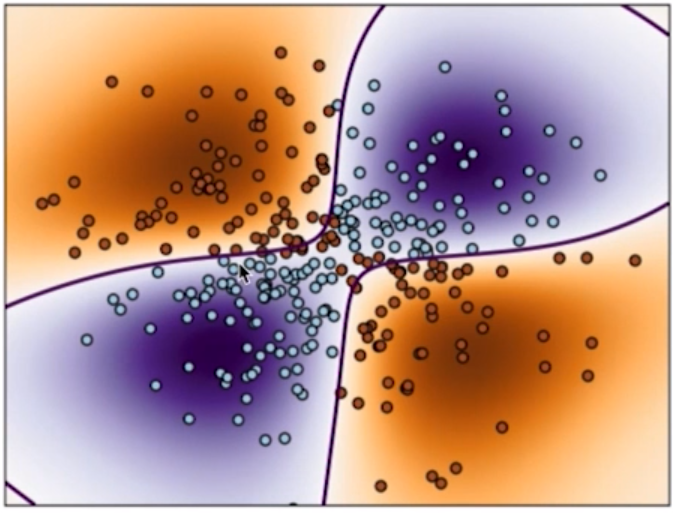

**bu literatürde çok kullanılan XOR örneği, bir mantık operatörü. Doğrusal olmayan belki iki tane kernel kullanabileceğimiz örneği şuanda sınıflandırmak için  kullanabiliyor SVM algoritması.**

In [19]:
# csv dosyalarını okumak için
import pandas as pd
# csv dosyamızı okuduk.
data = pd.read_csv('veriler/voice.csv')
data

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


In [20]:
# Bağımlı Değişkeni ( label ) bir değişkene atadık
label = data.iloc[:,-1:].values

In [21]:
# Veri kümemizi test ve train şekinde bölüyoruz
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:,:-1],label,test_size=0.33,random_state=0)

In [22]:
# SVC sınıfını import ettik ( Support Vector Classifier )
from sklearn.svm import SVC

# SVC sınıfından bir nesne ürettik
# Parametre olarak farklı kernel trick tipleri verilebilir.
# Başarı oranının değiştiği gözlemlenecektir. ( ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ )
# kernelin default değeri 'rbf' dir.
svc = SVC(kernel = 'linear')

In [23]:
# Makineyi eğitiyoruz

svc.fit(x_train,y_train)

# Test veri kümemizi verdik ve cinsiyet tahmin etmesini sağladık
result = svc.predict(x_test)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
from sklearn.metrics import confusion_matrix
# Parametre olarak karşılaştıracağımız verileri giriyoruz.
# y_test : Gerçek cinsiyet Test Verisi
# result : x_test verisinden tahmin ettiğimiz cinsiyet verileri
# Confusion Matrix Sonucu :
cm = confusion_matrix(y_test,result)
cm

array([[422,  74],
       [  5, 545]], dtype=int64)

In [25]:
# Başarı Oranı
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, result)
# Sonuç : 0.739961759082218
print(accuracy)

0.9244741873804971


**Not : Eğer kernel değerini ‘rbf’ yerine ‘linear’ yapsaydık başarı oranı 0.92.. yada ‘sigmoid’ yapsaydık 0.36.. başarı oranı elde edecektik. kernel parametresini değiştirerek başarı oranını değiştirebiliriz böylece daha uyumlu modeller geliştirebiliriz.**
**Burada örnek amaçlı olsun diye farklı bir veri ve çok farklı olmayan kodlar kullandım.